In [ ]:
 #This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '7181014a-9bfd-48c1-a444-487d557bdcac',
}

# Create a session object
session = Session()
session.headers.update(headers)

# # Define chunk size for data retrieval (adjust as needed)
# limit_per_request = 100
# total_data = []  # List to store all retrieved data

# # Iterate through data in chunks
# for i in range(0, 5000, limit_per_request):
#   parameters = {
#     'start': str(i + 1),
#     'limit': str(limit_per_request),
#     'convert': "USD"
#   }

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-05-21T17:53:50.575Z', 'error_code': 0, 'error_message': None, 'elapsed': 27, 'credit_count': 1, 'notice': None, 'total_count': 9989}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11056, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [ ]:
type(data)
dict

dict

In [ ]:
import pandas as pd

#see all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [ ]:
#makes data pretty
df = pd.json_normalize(data['data'])

df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11056,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19701412.00000,19701412.00000,False,NaN,1,NaN,NaN,None,2024-05-21T17:53:00.000Z,69712.40849,59323237251.84389,113.68160,-0.16880,1.90232,13.92067,7.48366,9.54853,36.76526,1373432881191.59961,53.06000,1463960578308.98999,None,2024-05-21T17:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-21 17:53:58.301870
1,1027,Ethereum,ETH,ethereum,8970,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120127448.77501,120127448.77501,True,NaN,2,NaN,NaN,None,2024-05-21T17:52:00.000Z,3736.81357,51427746737.78312,313.94700,-1.22989,19.00497,30.03559,18.72421,11.97888,28.85772,448893881222.96362,17.34980,448893881222.96002,None,2024-05-21T17:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-21 17:53:58.301870
2,825,Tether USDt,USDT,tether,86108,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,111364216399.09758,114086550454.35260,True,NaN,3,NaN,NaN,None,2024-05-21T17:52:00.000Z,0.99944,130472442056.52910,153.12290,-0.00523,-0.08984,0.00652,-0.08443,-0.05824,-0.04178,111301438788.68704,4.30180,114022238225.08000,None,2024-05-21T17:52:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-21 17:53:58.301870
3,1839,BNB,BNB,bnb,2164,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147586117.98329,147586117.98329,False,NaN,4,NaN,NaN,None,2024-05-21T17:52:00.000Z,614.69801,3982481814.04443,162.13270,-0.13632,6.33859,8.68759,7.18043,12.00609,66.85420,90720892778.64775,3.50640,90720892778.64999,None,2024-05-21T17:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-21 17:53:58.301870
4,5426,Solana,SOL,solana,661,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,449152800.23522,576482330.24019,True,NaN,5,NaN,NaN,None,2024-05-21T17:52:00.000Z,177.14349,5595760423.32327,70.71480,0.00715,-2.16825,23.75101,19.12724,2.82094,72.87187,79564493001.36183,3.07380,102120089879.84000,None,2024-05-21T17:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-21 17:53:58.301870
5,3408,USDC,USDC,usd-coin,19289,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33173787894.31743,33173787894.31743,False,NaN,6,NaN,NaN,None,2024-05-21T17:52:00.000Z,0.99997,13758164253.86186,132.64560,-0.00277,-0.01563,-0.00484,-0.01502,-0.00031,-0.00604,33172737008.64351,1.28210,33172737008.64000,None,2024-05-21T17:52:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-21 17:53:58.301870
6,52,XRP,XRP,xrp,1322,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55288951055.00000,99987612649.00000,False,NaN,7,NaN,NaN,None,2024-05-21T17:53:00.000Z,0.54421,2263816044.21256,148.59730,0.09197,4.36082,7.93529,3.79482,-11.03314,0.79733,30088671594.22337,1.16290,54420767658.07000,None,2024-05-21T17:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-21 17:53:58.301870
7,74,Dogecoin,DOGE,dogecoin,969,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,144383816383.70520,144383816383.70520,True,NaN,8,NaN,NaN,None,2024-05-21T17:53:00.000Z,0.16820,3045392876.59733,269.04760,-0.49354,9.65179,15.32319,6.78051,10.77394,102.85770,24285931938.16533,0.93870,24285931938.17000,None,2024-05-21T17:53:00.000

In [ ]:
def api_runner():
  global df

  url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
  parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
  }
  headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '7181014a-9bfd-48c1-a444-487d557bdcac',
  }

  # Create a session object
  session = Session()
  session.headers.update(headers)

  # # Define chunk size for data retrieval (adjust as needed)
  # limit_per_request = 100
  # total_data = []  # List to store all retrieved data

  # # Iterate through data in chunks
  # for i in range(0, 5000, limit_per_request):
  #   parameters = {
  #     'start': str(i + 1),
  #     'limit': str(limit_per_request),
  #     'convert': "USD"
  #   }

  try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    print(data)
  except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)


    #makes data pretty
  df2 = pd.json_normalize(data['data'])
  df2['Timestamp'] = pd.to_datetime('now')
  df = pd.concat([df,df2], ignore_index=True)

In [ ]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

{'status': {'timestamp': '2024-05-21T17:52:47.219Z', 'error_code': 0, 'error_message': None, 'elapsed': 37, 'credit_count': 1, 'notice': None, 'total_count': 9989}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11056, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [ ]:
df


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11056,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19701412.00000,19701412.00000,False,NaN,1,NaN,NaN,None,2024-05-21T17:53:00.000Z,69712.40849,59323237251.84389,113.68160,-0.16880,1.90232,13.92067,7.48366,9.54853,36.76526,1373432881191.59961,53.06000,1463960578308.98999,None,2024-05-21T17:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-21 17:53:58.301870
1,1027,Ethereum,ETH,ethereum,8970,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120127448.77501,120127448.77501,True,NaN,2,NaN,NaN,None,2024-05-21T17:52:00.000Z,3736.81357,51427746737.78312,313.94700,-1.22989,19.00497,30.03559,18.72421,11.97888,28.85772,448893881222.96362,17.34980,448893881222.96002,None,2024-05-21T17:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-21 17:53:58.301870
2,825,Tether USDt,USDT,tether,86108,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,111364216399.09758,114086550454.35260,True,NaN,3,NaN,NaN,None,2024-05-21T17:52:00.000Z,0.99944,130472442056.52910,153.12290,-0.00523,-0.08984,0.00652,-0.08443,-0.05824,-0.04178,111301438788.68704,4.30180,114022238225.08000,None,2024-05-21T17:52:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-21 17:53:58.301870
3,1839,BNB,BNB,bnb,2164,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147586117.98329,147586117.98329,False,NaN,4,NaN,NaN,None,2024-05-21T17:52:00.000Z,614.69801,3982481814.04443,162.13270,-0.13632,6.33859,8.68759,7.18043,12.00609,66.85420,90720892778.64775,3.50640,90720892778.64999,None,2024-05-21T17:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-21 17:53:58.301870
4,5426,Solana,SOL,solana,661,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,449152800.23522,576482330.24019,True,NaN,5,NaN,NaN,None,2024-05-21T17:52:00.000Z,177.14349,5595760423.32327,70.71480,0.00715,-2.16825,23.75101,19.12724,2.82094,72.87187,79564493001.36183,3.07380,102120089879.84000,None,2024-05-21T17:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-21 17:53:58.301870
5,3408,USDC,USDC,usd-coin,19289,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33173787894.31743,33173787894.31743,False,NaN,6,NaN,NaN,None,2024-05-21T17:52:00.000Z,0.99997,13758164253.86186,132.64560,-0.00277,-0.01563,-0.00484,-0.01502,-0.00031,-0.00604,33172737008.64351,1.28210,33172737008.64000,None,2024-05-21T17:52:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-21 17:53:58.301870
6,52,XRP,XRP,xrp,1322,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55288951055.00000,99987612649.00000,False,NaN,7,NaN,NaN,None,2024-05-21T17:53:00.000Z,0.54421,2263816044.21256,148.59730,0.09197,4.36082,7.93529,3.79482,-11.03314,0.79733,30088671594.22337,1.16290,54420767658.07000,None,2024-05-21T17:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-21 17:53:58.301870
7,74,Dogecoin,DOGE,dogecoin,969,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,144383816383.70520,144383816383.70520,True,NaN,8,NaN,NaN,None,2024-05-21T17:53:00.000Z,0.16820,3045392876.59733,269.04760,-0.49354,9.65179,15.32319,6.78051,10.77394,102.85770,24285931938.16533,0.93870,24285931938.17000,None,2024-05-21T17:53:00.000

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11056,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19701412.00000,19701412.00000,False,NaN,1,NaN,NaN,None,2024-05-21T17:53:00.000Z,69712.40849,59323237251.84389,113.68160,-0.16880,1.90232,13.92067,7.48366,9.54853,36.76526,1373432881191.59961,53.06000,1463960578308.98999,None,2024-05-21T17:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-21 17:53:58.301870
1,1027,Ethereum,ETH,ethereum,8970,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120127448.77501,120127448.77501,True,NaN,2,NaN,NaN,None,2024-05-21T17:52:00.000Z,3736.81357,51427746737.78312,313.94700,-1.22989,19.00497,30.03559,18.72421,11.97888,28.85772,448893881222.96362,17.34980,448893881222.96002,None,2024-05-21T17:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-21 17:53:58.301870
2,825,Tether USDt,USDT,tether,86108,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,111364216399.09758,114086550454.35260,True,NaN,3,NaN,NaN,None,2024-05-21T17:52:00.000Z,0.99944,130472442056.52910,153.12290,-0.00523,-0.08984,0.00652,-0.08443,-0.05824,-0.04178,111301438788.68704,4.30180,114022238225.08000,None,2024-05-21T17:52:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-21 17:53:58.301870
3,1839,BNB,BNB,bnb,2164,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147586117.98329,147586117.98329,False,NaN,4,NaN,NaN,None,2024-05-21T17:52:00.000Z,614.69801,3982481814.04443,162.13270,-0.13632,6.33859,8.68759,7.18043,12.00609,66.85420,90720892778.64775,3.50640,90720892778.64999,None,2024-05-21T17:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-21 17:53:58.301870
4,5426,Solana,SOL,solana,661,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,449152800.23522,576482330.24019,True,NaN,5,NaN,NaN,None,2024-05-21T17:52:00.000Z,177.14349,5595760423.32327,70.71480,0.00715,-2.16825,23.75101,19.12724,2.82094,72.87187,79564493001.36183,3.07380,102120089879.84000,None,2024-05-21T17:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-21 17:53:58.301870
5,3408,USDC,USDC,usd-coin,19289,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33173787894.31743,33173787894.31743,False,NaN,6,NaN,NaN,None,2024-05-21T17:52:00.000Z,0.99997,13758164253.86186,132.64560,-0.00277,-0.01563,-0.00484,-0.01502,-0.00031,-0.00604,33172737008.64351,1.28210,33172737008.64000,None,2024-05-21T17:52:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-21 17:53:58.301870
6,52,XRP,XRP,xrp,1322,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55288951055.00000,99987612649.00000,False,NaN,7,NaN,NaN,None,2024-05-21T17:53:00.000Z,0.54421,2263816044.21256,148.59730,0.09197,4.36082,7.93529,3.79482,-11.03314,0.79733,30088671594.22337,1.16290,54420767658.07000,None,2024-05-21T17:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-21 17:53:58.301870
7,74,Dogecoin,DOGE,dogecoin,969,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,144383816383.70520,144383816383.70520,True,NaN,8,NaN,NaN,None,2024-05-21T17:53:00.000Z,0.16820,3045392876.59733,269.04760,-0.49354,9.65179,15.32319,6.78051,10.77394,102.85770,24285931938.16533,0.93870,24285931938.17000,None,2024-05-21T17:53:00.000

In [ ]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.16880,1.90232,13.92067,7.48366,9.54853,36.76526
Ethereum,-1.22989,19.00497,30.03559,18.72421,11.97888,28.85772
Tether USDt,-0.00523,-0.08984,0.00652,-0.08443,-0.05824,-0.04178
BNB,-0.13632,6.33859,8.68759,7.18043,12.00609,66.85420
Solana,0.00715,-2.16825,23.75101,19.12724,2.82094,72.87187
USDC,-0.00277,-0.01563,-0.00484,-0.01502,-0.00031,-0.00604
XRP,0.09197,4.36082,7.93529,3.79482,-11.03314,0.79733
Dogecoin,-0.49354,9.65179,15.32319,6.78051,10.77394,102.85770
Toncoin,0.41848,-2.09383,-6.24073,4.85856,48.04895,202.37515


In [ ]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.16880
              quote.USD.percent_change_24h     1.90232
              quote.USD.percent_change_7d     13.92067
              quote.USD.percent_change_30d     7.48366
              quote.USD.percent_change_60d     9.54853
              quote.USD.percent_change_90d    36.76526
Ethereum      quote.USD.percent_change_1h     -1.22989
              quote.USD.percent_change_24h    19.00497
              quote.USD.percent_change_7d     30.03559
              quote.USD.percent_change_30d    18.72421
              quote.USD.percent_change_60d    11.97888
              quote.USD.percent_change_90d    28.85772
Tether USDt   quote.USD.percent_change_1h     -0.00523
              quote.USD.percent_change_24h    -0.08984
              quote.USD.percent_change_7d      0.00652
              quote.USD.percent_change_30d    -0.08443
              quote.USD.percent_change_60d    -0.05824
              quote.US

In [ ]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.16880
             quote.USD.percent_change_24h   1.90232
             quote.USD.percent_change_7d   13.92067
             quote.USD.percent_change_30d   7.48366
             quote.USD.percent_change_60d   9.54853
             quote.USD.percent_change_90d  36.76526
Ethereum     quote.USD.percent_change_1h   -1.22989
             quote.USD.percent_change_24h  19.00497
             quote.USD.percent_change_7d   30.03559
             quote.USD.percent_change_30d  18.72421
             quote.USD.percent_change_60d  11.97888
             quote.USD.percent_change_90d  28.85772
Tether USDt  quote.USD.percent_change_1h   -0.00523
             quote.USD.percent_change_24h  -0.08984
             quote.USD.percent_change_7d    0.00652
             quote.USD.percent_change_30d  -0.08443
             quote.USD.percent_change_60d  -0.05824
             quote.USD.percent_change_90d  -0.04178
BNB          quote.USD.percent_change_1h   -0.13632
             quote.USD.percent_change_24h   6.33859
             quote.USD.percent_change_7d    8.68759
             quote.USD.percent_change_30d   7.18043
             quote.USD.percent_change_60d  12.00609
             quote.USD.percent_change_90d  66.85420
Solana       quote.USD.percent_change_1h    0.00715
             quote.USD.percent_change_24h  -2.16825
             quote.USD.percent_change_7d   23.75101
             quote.USD.percent_change_30d  19.12724
             quote.USD.percent_change_60d   2.82094
             quote.USD.percent_change_90d  72.87187
USDC         quote.USD.percent_change_1h   -0.00277
             quote.USD.percent_change_24h  -0.01563
             quote.USD.percent_change_7d   -0.00484
             quote.USD.percent_change_30d  -0.01502
             quote.USD.percent_change_60d  -0.00031
             quote.USD.percent_change_90d  -0.00604
XRP          quote.USD.percent_change_1h    0.09197
             quote.USD.percent_change_24h   4.36082
             quote.USD.percent_change_7d    7.93529
             quote.USD.percent_change_30d   3.79482
             quote.USD.percent_change_60d -11.03314
             quote.USD.percent_change_90d   0.79733
Dogecoin     quote.USD.percent_change_1h   -0.49354
             quote.USD.percent_change_24h   9.65179
             quote.USD.percent_change_7d   15.32319
             quote.USD.percent_change_30d   6.78051
             quote.USD.percent_change_60d  10.77394
             quote.USD.percent_change_90d 102.85770
Toncoin      quote.USD.percent_change_1h    0.41848
             quote.USD.percent_change_24h  -2.09383
             quote.USD.percent_change_7d   -6.24073
             quote.USD.percent_change_30d   4.85856
             quote.USD.percent_change_60d  48.04895
             quote.USD.percent_change_90d 202.37515
Cardano      quote.USD.percent_change_1h    0.43843
             quote.USD.percent_change_24h   7.17087
             quote.USD.percent_change_7d   16.66807
             quote.USD.percent_change_30d   1.36617
             quote.USD.percent_change_60d -18.04599
             quote.USD.percent_change_90d -13.81322
Avalanche    quote.USD.percent_change_1h    0.67953
             quote.USD.percent_change_24h  11.25645
             quote.USD.percent_change_7d   29.06957
             quote.USD.percent_change_30d  10.95276
             quote.USD.percent_change_60d -23.27308
             quote.USD.percent_change_90d  12.97164
Shiba Inu    quote.USD.percent_change_1h   -0.75460
             quote.USD.percent_change_24h   5.43898
             quote.USD.percent_change_7d    9.77506
             quote.USD.percent_change_30d  -0.68391
             quote.USD.percent_change_60d  -3.60871
             quote.USD.percent_change_90d 172.80633
Polkadot     quote.USD.percent_change_1h    0.21228
             quote.USD.percent_change_24h   6.73912
             quote.USD.percent_change_7d   15.87322
             quote.USD.percent_change_30d

In [ ]:
df5.count()

values    90
dtype: int64

In [ ]:
# As the data is not well structed  let's not pass a column as an index instead create a range and passed that as the data frame
index = pd.Index(range(624))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.16880
1,Bitcoin,quote.USD.percent_change_24h,1.90232
2,Bitcoin,quote.USD.percent_change_7d,13.92067
3,Bitcoin,quote.USD.percent_change_30d,7.48366
4,Bitcoin,quote.USD.percent_change_60d,9.54853
5,Bitcoin,quote.USD.percent_change_90d,36.76526
6,Ethereum,quote.USD.percent_change_1h,-1.22989
7,Ethereum,quote.USD.percent_change_24h,19.00497
8,Ethereum,quote.USD.percent_change_7d,30.03559
9,Ethereum,quote.USD.percent_change_30d,18.72421


In [ ]:
#change the column name
df7 = df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.16880
1,Bitcoin,quote.USD.percent_change_24h,1.90232
2,Bitcoin,quote.USD.percent_change_7d,13.92067
3,Bitcoin,quote.USD.percent_change_30d,7.48366
4,Bitcoin,quote.USD.percent_change_60d,9.54853
5,Bitcoin,quote.USD.percent_change_90d,36.76526
6,Ethereum,quote.USD.percent_change_1h,-1.22989
7,Ethereum,quote.USD.percent_change_24h,19.00497
8,Ethereum,quote.USD.percent_change_7d,30.03559
9,Ethereum,quote.USD.percent_change_30d,18.72421


In [ ]:
#change value name for better look
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h', '24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.16880
1,Bitcoin,24h,1.90232
2,Bitcoin,7d,13.92067
3,Bitcoin,30d,7.48366
4,Bitcoin,60d,9.54853
5,Bitcoin,90d,36.76526
6,Ethereum,1h,-1.22989
7,Ethereum,24h,19.00497
8,Ethereum,7d,30.03559
9,Ethereum,30d,18.72421


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

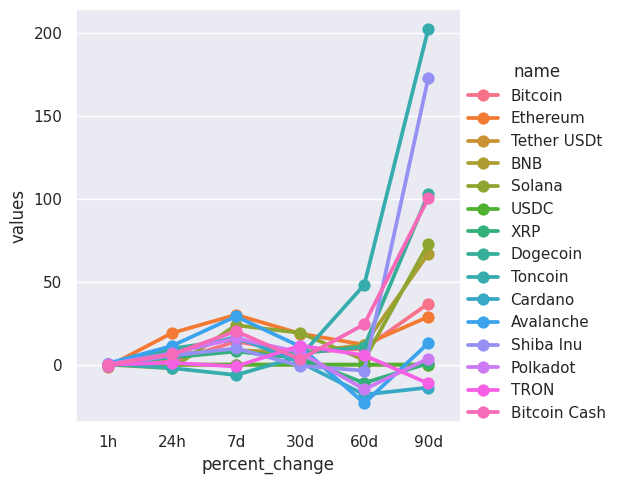

In [ ]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [ ]:
#create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,69712.40849,2024-05-21 17:53:58.301870
